**Problem Statement:**
In this 2nd mini project, 
*   We have to collect 20k comments from any sourse, no repetition allowed between students;
*   We have to label that comments as positive and negative. 
*   Apply 3 algorithms and compare results:




 


**Import necessary libraries**

In [34]:
#Load the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

from google.colab import files
uploaded = files.upload()

Saving moviecomments (1).csv to moviecomments (1).csv


**Import training dataset**

In [36]:
import io
imdb_data = pd.read_csv(io.BytesIO(uploaded['moviecomments (1).csv']))
# Dataset is now stored in a Pandas Dataframe

In [37]:
print(imdb_data.shape)
imdb_data.head(10)

(20000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


**Exploratery data analysis**

In [38]:
#Summary of the dataset
imdb_data.describe()

,review,sentiment
count,20000,20000
unique,19926,2
top,Loved today's show!!! It was a variety and not...,negative
freq,4,10097


**Sentiment count**

In [39]:
#sentiment count
imdb_data['sentiment'].value_counts()

negative    10097
positive     9903
Name: sentiment, dtype: int64

We can see that negative comments are more than positive

**Splitting the training set**

In [51]:
#split the dataset  
#train dataset
train_reviews=imdb_data.review[:15000]
train_sentiments=imdb_data.sentiment[:15000]
#test dataset
test_reviews=imdb_data.review[15000:]
test_sentiments=imdb_data.sentiment[15000:]
print(train_reviews.shape,train_sentiments.shape)
print(test_reviews.shape,test_sentiments.shape)

(15000,) (15000,)
(5000,) (5000,)


**Removing html strips and noise text**

In [41]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(denoise_text)

**Removing special characters**

In [42]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(remove_special_characters)

**Text stemming**

In [43]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(simple_stemmer)

**Removing stopwords**

In [44]:
nltk.download('stopwords')
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [45]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(remove_stopwords)

{"couldn't", "doesn't", 'wouldn', 'my', 'theirs', 'but', 'when', 'further', "you've", 'why', 'mustn', 'she', 'such', 'there', 'aren', 'won', 'both', "shouldn't", 'our', 'over', 'do', 'more', 'their', 'itself', 'too', 'an', 'me', "should've", "you'd", 'yourselves', 'few', 'other', 'so', "mightn't", 'can', "that'll", 'which', 'all', 'those', 'couldn', 'its', 'himself', 'with', 'into', "aren't", 't', 'these', 'him', 'through', 'did', 'a', 'own', 'shan', 'during', 'have', 'yours', 'as', 'between', 'until', 'hers', 'each', 'some', 'than', 'doesn', 'will', 'is', 'shouldn', 'about', 'll', 'his', "wasn't", 'not', 'o', 'then', 'doing', 'down', 'at', 'mightn', 'needn', 'before', 'they', "didn't", 'no', 'herself', 'being', 'does', 'be', 'it', 'been', 'from', 'don', "needn't", 'nor', 'weren', "hadn't", 'by', 'this', "she's", 'in', 'after', "wouldn't", 'that', 'has', 'yourself', 'he', 'only', 'here', 'if', 'very', 'having', "haven't", 'your', 've', 'whom', 's', 'you', 'had', "hasn't", 'what', "you'

In [52]:
#normalized train reviews
norm_train_reviews=imdb_data.review[:15000]
norm_train_reviews[0]
#convert dataframe to string
#norm_train_string=norm_train_reviews.to_string()
#Spelling correction using Textblob
#norm_train_spelling=TextBlob(norm_train_string)
#norm_train_spelling.correct()
#Tokenization using Textblob
#norm_train_words=norm_train_spelling.words
#norm_train_words

'one review ha mention watch 1 oz episod youll hook right thi exactli happen meth first thing struck oz wa brutal unflinch scene violenc set right word go trust thi show faint heart timid thi show pull punch regard drug sex violenc hardcor classic use wordit call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far awayi would say main appeal show due fact goe show wouldnt dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz doesnt mess around first episod ever saw struck nasti wa surreal couldnt say wa readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard wholl sold nickel inmat wholl kill order get away well manner middl class inmat turn prison bitch due lack street skill prison exp

In [55]:
#Normalized test reviews
norm_test_reviews=imdb_data.review[15000:]
norm_test_reviews[17000]
##convert dataframe to string
#norm_test_string=norm_test_reviews.to_string()
#spelling correction using Textblob
#norm_test_spelling=TextBlob(norm_test_string)
#print(norm_test_spelling.correct())
#Tokenization using Textblob
#norm_test_words=norm_test_spelling.words
#norm_test_words

'thi bottom barrel type bfilm one poverti row studio monogram mid40 kind fill doubl billonli reason watch wa see jacki moran wa like lead role page boy radio station attempt solv murder play phil mead gone wind onli two year earlier thi wa one hi last teenag role mickey rooneyth script hapless product valu full clich ridden situat cast uniformli untal individu wanda mckay switchboard girl discov radio produc sidney miller nerdi friend hero afraid hi shadowmerci hour murder solv roundup suspect terribl overact onli quiet perform ani interest given jon gilbreath tex cowboy bite dust brief appearancether sever song forgett lame joke dialog'

**Bags of words model**

In [56]:
#Count vectorizer for bag of words
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_train_reviews=cv.fit_transform(norm_train_reviews)
#transformed test reviews
cv_test_reviews=cv.transform(norm_test_reviews)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)
#vocab=cv.get_feature_names()-toget feature names

BOW_cv_train: (15000, 2622926)
BOW_cv_test: (5000, 2622926)


**Term Frequency-Inverse Document Frequency model(TFIDF)**

In [57]:
#Tfidf vectorizer
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
#transformed train reviews
tv_train_reviews=tv.fit_transform(norm_train_reviews)
#transformed test reviews
tv_test_reviews=tv.transform(norm_test_reviews)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (15000, 2622926)
Tfidf_test: (5000, 2622926)


**Labeling the sentiment text**

In [58]:
#labeling the sentient data
lb=LabelBinarizer()
#transformed sentiment data
sentiment_data=lb.fit_transform(imdb_data['sentiment'])
print(sentiment_data.shape)

(20000, 1)


**Split the sentiment tdata**

In [59]:
#Spliting the sentiment data
train_sentiments=sentiment_data[:15000]
test_sentiments=sentiment_data[15000:]
print(train_sentiments)
print(test_sentiments)

[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [1]]
[[0]
 [0]
 [1]
 ...
 [1]
 [0]
 [1]]


**Modelling the dataset**
We build logistic regression model for both bag of words and tfidf features

In [60]:
#training the model
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
#Fitting the model for Bag of words
lr_bow=lr.fit(cv_train_reviews,train_sentiments)
print(lr_bow)
#Fitting the model for tfidf features
lr_tfidf=lr.fit(tv_train_reviews,train_sentiments)
print(lr_tfidf)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1, max_iter=500, random_state=42)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1, max_iter=500, random_state=42)


**Logistic regression model performane on test dataset**

In [61]:
#Predicting the model for bag of words
lr_bow_predict=lr.predict(cv_test_reviews)
print(lr_bow_predict)
##Predicting the model for tfidf features
lr_tfidf_predict=lr.predict(tv_test_reviews)
print(lr_tfidf_predict)

[1 0 0 ... 1 0 1]
[1 0 0 ... 1 0 0]


**Accuracy of the model**

In [62]:
#Accuracy score for bag of words
lr_bow_score=accuracy_score(test_sentiments,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)
#Accuracy score for tfidf features
lr_tfidf_score=accuracy_score(test_sentiments,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

lr_bow_score : 0.7282
lr_tfidf_score : 0.6752


**Print the classification model**

In [63]:
#Classification report for bag of words 
lr_bow_report=classification_report(test_sentiments,lr_bow_predict,target_names=['Positive','Negative'])
print(lr_bow_report)

#Classification report for tfidf features
lr_tfidf_report=classification_report(test_sentiments,lr_tfidf_predict,target_names=['Positive','Negative'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.70      0.80      0.75      2488
    Negative       0.77      0.66      0.71      2512

    accuracy                           0.73      5000
   macro avg       0.73      0.73      0.73      5000
weighted avg       0.73      0.73      0.73      5000

              precision    recall  f1-score   support

    Positive       0.62      0.92      0.74      2488
    Negative       0.85      0.43      0.57      2512

    accuracy                           0.68      5000
   macro avg       0.73      0.68      0.65      5000
weighted avg       0.73      0.68      0.65      5000



**Confusion matrix**

In [64]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,lr_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,lr_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[1650  862]
 [ 497 1991]]
[[1081 1431]
 [ 193 2295]]


**Stochastic gradient descent or Linear support vector machines for bag of words and tfidf features**

In [66]:
#training the linear svm
svm=SGDClassifier(loss='hinge',max_iter=500,random_state=42)
#fitting the svm for bag of words
svm_bow=svm.fit(cv_train_reviews,train_sentiments)
print(svm_bow)
#fitting the svm for tfidf features
svm_tfidf=svm.fit(tv_train_reviews,train_sentiments)
print(svm_tfidf)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(max_iter=500, random_state=42)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(max_iter=500, random_state=42)


**Model performance on data**

In [67]:
#Predicting the model for bag of words
svm_bow_predict=svm.predict(cv_test_reviews)
print(svm_bow_predict)
#Predicting the model for tfidf features
svm_tfidf_predict=svm.predict(tv_test_reviews)
print(svm_tfidf_predict)

[1 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


**Accuracy of the model**

In [68]:
#Accuracy score for bag of words
svm_bow_score=accuracy_score(test_sentiments,svm_bow_predict)
print("svm_bow_score :",svm_bow_score)
#Accuracy score for tfidf features
svm_tfidf_score=accuracy_score(test_sentiments,svm_tfidf_predict)
print("svm_tfidf_score :",svm_tfidf_score)

svm_bow_score : 0.599
svm_tfidf_score : 0.5002


**Print the classification report**

In [69]:
#Classification report for bag of words 
svm_bow_report=classification_report(test_sentiments,svm_bow_predict,target_names=['Positive','Negative'])
print(svm_bow_report)
#Classification report for tfidf features
svm_tfidf_report=classification_report(test_sentiments,svm_tfidf_predict,target_names=['Positive','Negative'])
print(svm_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.56      0.97      0.71      2488
    Negative       0.90      0.23      0.36      2512

    accuracy                           0.60      5000
   macro avg       0.73      0.60      0.54      5000
weighted avg       0.73      0.60      0.53      5000

              precision    recall  f1-score   support

    Positive       0.50      1.00      0.67      2488
    Negative       1.00      0.01      0.01      2512

    accuracy                           0.50      5000
   macro avg       0.75      0.50      0.34      5000
weighted avg       0.75      0.50      0.34      5000



**Plot the confusion matrix**

In [70]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,svm_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,svm_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[ 573 1939]
 [  66 2422]]
[[  13 2499]
 [   0 2488]]


**Naive Bayes for bag of words and tfidf features**


In [71]:
#training the model
mnb=MultinomialNB()
#fitting the svm for bag of words
mnb_bow=mnb.fit(cv_train_reviews,train_sentiments)
print(mnb_bow)
#fitting the svm for tfidf features
mnb_tfidf=mnb.fit(tv_train_reviews,train_sentiments)
print(mnb_tfidf)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()


**Model performance on test data**

In [72]:
#Predicting the model for bag of words
mnb_bow_predict=mnb.predict(cv_test_reviews)
print(mnb_bow_predict)
#Predicting the model for tfidf features
mnb_tfidf_predict=mnb.predict(tv_test_reviews)
print(mnb_tfidf_predict)

[1 0 0 ... 1 1 1]
[1 0 0 ... 1 0 1]


**Accuracy of the model**

In [73]:
#Accuracy score for bag of words
mnb_bow_score=accuracy_score(test_sentiments,mnb_bow_predict)
print("mnb_bow_score :",mnb_bow_score)
#Accuracy score for tfidf features
mnb_tfidf_score=accuracy_score(test_sentiments,mnb_tfidf_predict)
print("mnb_tfidf_score :",mnb_tfidf_score)

mnb_bow_score : 0.7314
mnb_tfidf_score : 0.7262


**Print the classification report**

In [74]:
#Classification report for bag of words 
mnb_bow_report=classification_report(test_sentiments,mnb_bow_predict,target_names=['Positive','Negative'])
print(mnb_bow_report)
#Classification report for tfidf features
mnb_tfidf_report=classification_report(test_sentiments,mnb_tfidf_predict,target_names=['Positive','Negative'])
print(mnb_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.72      0.76      0.74      2488
    Negative       0.75      0.70      0.72      2512

    accuracy                           0.73      5000
   macro avg       0.73      0.73      0.73      5000
weighted avg       0.73      0.73      0.73      5000

              precision    recall  f1-score   support

    Positive       0.69      0.83      0.75      2488
    Negative       0.79      0.62      0.70      2512

    accuracy                           0.73      5000
   macro avg       0.74      0.73      0.72      5000
weighted avg       0.74      0.73      0.72      5000



**Plot the confusion matrix**

In [75]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,mnb_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,mnb_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[1756  756]
 [ 587 1901]]
[[1564  948]
 [ 421 2067]]


**Let us see positive and negative words by using WordCloud. Word cloud for positive review words:**

<function matplotlib.pyplot.show(*args, **kw)>

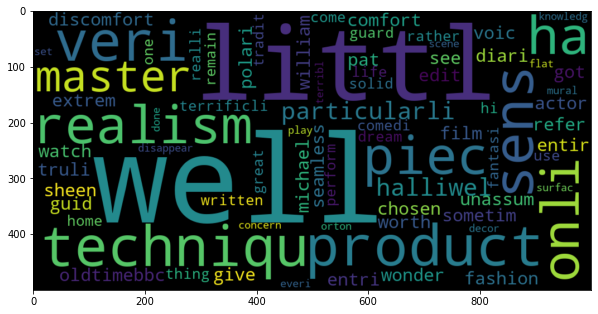

In [76]:
#word cloud for positive review words
plt.figure(figsize=(10,10))
positive_text=norm_train_reviews[1]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

**Word cloud for negative review words**

<function matplotlib.pyplot.show(*args, **kw)>

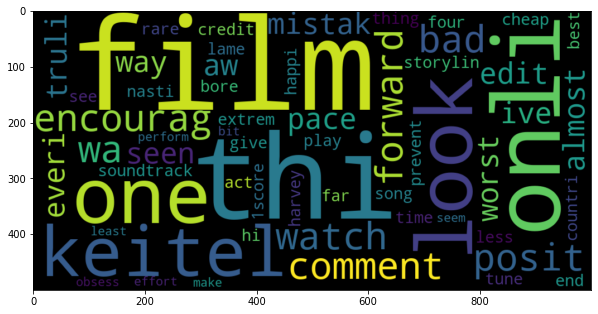

In [77]:
#Word cloud for negative review words
plt.figure(figsize=(10,10))
negative_text=norm_train_reviews[8]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show